# 0011. Container With Most Water (Brute Force Approach)

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig.A | 04.01.2026 | 🟡 Medium | Array, Two Pointers |

**Problem Link:** [LeetCode 0011](https://leetcode.com/problems/container-with-most-water/)

---

## 1. Problem Statement
You are given an integer array `height` of length `n`. There are `n` vertical lines drawn such that the two endpoints of the `i-th` line are `(i, 0)` and `(i, height[i])`.

Find two lines that together with the x-axis form a container, such that the container contains the most water. Return the maximum amount of water a container can store.

* Notice that you may not slant the container.

**Example:**
```text
Input: height = [1,8,6,2,5,4,8,3,7]
Output: 49
Explanation: The max area is between index 1 (height 8) and index 8 (height 7). 
Area = min(8, 7) * (8 - 1) = 7 * 7 = 49.

#### 🚀 Approach: Optimized Two Pointers
We can slightly improve the standard Two Pointers approach by skipping lines that are **shorter or equal** to the current edge we just moved from.
* **Logic:**
    1. Same setup as the standard Two Pointers approach.
    2. When moving the `left` pointer (because it was shorter), store its height as `current_left`.
    3. **Skip:** Continue moving `left` forward as long as `height[left] <= current_left`.
        * Reasoning: Since the width is decreasing, any line shorter than (or equal to) the one we just abandoned cannot possibly yield a larger area.
    4. Repeat the logic for the `right` pointer.
* **Complexity:**
    * **Time:** $O(N)$ — Still linear, but fewer area calculations in practice.
    * **Space:** $O(1)$.
* **Verdict:** ⚡ **Faster in Practice**. Reduces the number of expensive multiplication operations on large datasets with many small values.

In [3]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        maximum=0
        l,r=0,len(height)-1
        while l<r:
            minimum=min(height[l],height[r])
            maximum=max(maximum,minimum*(r-l))
            if height[l]<height[r]:
                while (height[l]<=minimum) and l<r:
                    l+=1
            else:
                while (height[r]<=minimum) and l<r:
                    r-=1
        return maximum

In [4]:
l=[1,8,6,2,5,4,8,3,7]
solution=Solution()
solution.maxArea(l)

49

Running benchmark for 3 approaches...

Benchmark Results (Seconds):
       N  Brute Force  Two Pointers  Optimized Pointer
0    100     0.000593      0.000021           0.000009
1    500     0.020280      0.000097           0.000027
2   1000     0.062931      0.000165           0.000046
3   2000     0.237971      0.000340           0.000090
4   3000     0.541834      0.000491           0.000131
5   5000     1.499976      0.000836           0.000228
6   7500     3.385538      0.001230           0.000330
7  10000     5.959552      0.001606           0.000426


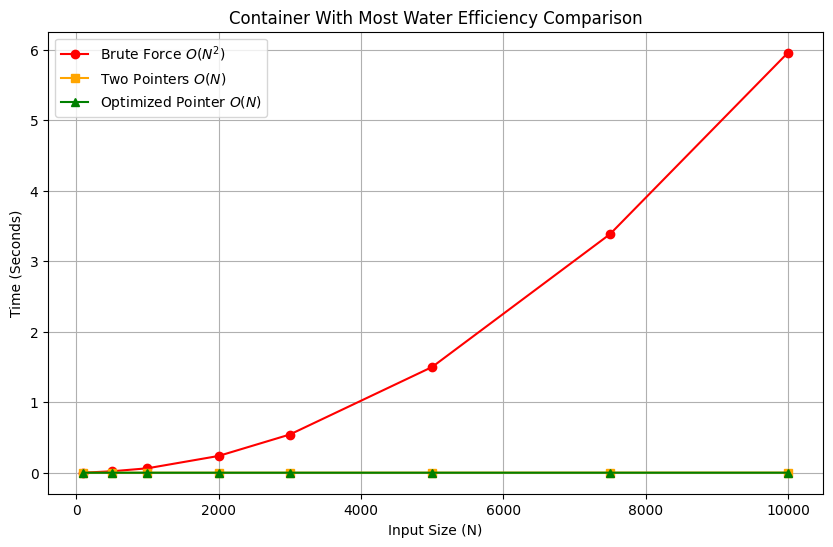

In [5]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

class Solution:
    # 1. Brute Force O(N^2)
    def brute_force(self, height: List[int]) -> int:
        max_area = 0
        n = len(height)
        for i in range(n):
            for j in range(i + 1, n):
                # Calculate area for every pair
                current_area = min(height[i], height[j]) * (j - i)
                max_area = max(max_area, current_area)
        return max_area

    # 2. Two Pointers O(N)
    def two_pointers(self, height: List[int]) -> int:
        l, r = 0, len(height) - 1
        max_area = 0
        while l < r:
            # Calculate area
            h = min(height[l], height[r])
            w = r - l
            max_area = max(max_area, h * w)
            
            # Move the shorter line
            if height[l] < height[r]:
                l += 1
            else:
                r -= 1
        return max_area

    # 3. Optimized Two Pointers O(N)
    # Skips lines shorter than the current boundary to avoid unnecessary calculations
    def optimized_two_pointers(self, height: List[int]) -> int:
        l, r = 0, len(height) - 1
        max_area = 0
        while l < r:
            h = min(height[l], height[r])
            w = r - l
            max_area = max(max_area, h * w)
            
            # Move pointers and skip lines that are not taller
            if height[l] < height[r]:
                current_l = height[l]
                l += 1
                while l < r and height[l] <= current_l:
                    l += 1
            else:
                current_r = height[r]
                r -= 1
                while l < r and height[r] <= current_r:
                    r -= 1
        return max_area

def run_benchmark():
    solution = Solution()
    
    # Input sizes to test
    # Brute Force is O(N^2), so we keep N <= 5000 to avoid long wait times
    input_sizes = [100, 500, 1000, 2000, 3000, 5000 ,7500 ,10000]
    results = []

    print("Running benchmark for 3 approaches...")
    
    for n in input_sizes:
        # Generate random heights
        heights = [random.randint(1, 10000) for _ in range(n)]
        
        # 1. Measure Brute Force
        start = time.time()
        solution.brute_force(heights)
        t_brute = time.time() - start

        # 2. Measure Two Pointers
        start = time.time()
        solution.two_pointers(heights)
        t_pointer = time.time() - start

        # 3. Measure Optimized Two Pointers
        start = time.time()
        solution.optimized_two_pointers(heights)
        t_opt_pointer = time.time() - start

        results.append({
            "N": n,
            "Brute Force": t_brute,
            "Two Pointers": t_pointer,
            "Optimized Pointer": t_opt_pointer
        })

    # Create DataFrame
    df = pd.DataFrame(results)
    print("\nBenchmark Results (Seconds):")
    print(df)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot lines with specific styles
    plt.plot(df["N"], df["Brute Force"], label='Brute Force $O(N^2)$', marker='o', color='red')
    plt.plot(df["N"], df["Two Pointers"], label='Two Pointers $O(N)$', marker='s', color='orange')
    plt.plot(df["N"], df["Optimized Pointer"], label='Optimized Pointer $O(N)$', marker='^', color='green')
    
    plt.title('Container With Most Water Efficiency Comparison')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Time (Seconds)')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

if __name__ == "__main__":
    run_benchmark()